- Expliquer pourquoi resampler pour l'EDA. fait
- Expliquer rapidement pourquoi resampler pour le ML. fait
- Expliquer les algorithmes de resampling. ( à faire dans ML).
- Expliquer pourquoi regarder matrice de corrélation. (fait)
- Expliquer pourquoi faire une ACP.
- Expliquer résultat ACP.
- Expliquer résultat Factor Map (corrélation entre variable).

- Expliquer boxplot negative, boxplot positive.
- Expliquer pourquoi on supprime des outliers.
- Expliquer comment nous on va supprimier certains outliers. Pourquoi on remove seulement des outliers fraudeur?
    - Peut être pour mieux trouver les fraudeurs.
    - http://signalsurgeon.com/how-to-use-statistics-to-identify-outliers-in-data/
- Envisager d'autre techniques pour remove outliers.



# Credit Card Fraud Detection

#Introduction

Aujourd'hui, nous ne pouvons plus vivre sans carte de crédit. Elles sont indispensables au bon fonctionnement de l'économie. Cependant, si la plus part des personnes en font une bonne utilisation, une minorité les utilise à mauvais escient. Le but de ce projet est la détection de fraude de carte de crédit.


Dans ce projet, mes buts seront de travailler sur les datasets déséquilibrés, de confronter plusieurs modèles machine learning entre eux (incluant du deep learning).

<b>Plan:</b>
- Introduction:
    - Contexte
    - my goals. (handle imbalanced dataset, confronter plusieurs modèles ML avec des modèle DL pytorch).
- I - Distribution des données
    - a - distribution de la variable Class.
    - b - distribution des variables Time et Amount.
    
- II - Handling imbalanced data.

- III - features selection.
    - Correlation matrix.
    - Kbest with Mutual information.


- IV - Anomaly detection.
    - Box plot
    - IQR.
    - D'autres?
    
- V - Visualization.
    - PCA.
    - Factor map.

<h1>Introduction</h1>

Au XXIe siècle, la plus part des gens utilise une carte de crédit pour faire des paiements. Ces transactions représentent des milliers de millards. Parmis toutes ces transactions certaines sont frauduleuses. Ces transactions frauduleuses atteignent des montants astronomiques de l'ordre du milliard. Il est important que les sociétés de cartes de crédit soient capables de reconnaître les transactions frauduleuses par carte de crédit afin que les clients ne soient pas facturés pour des articles qu'ils n'ont pas achetés. Nous avons ici un jeu de données Kaggle sur lequel nous allons travaillé afin de prédire les cas de fraudes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("tab10")
sns.set_theme()
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df =  pd.read_csv('/content/gdrive/MyDrive/DS_project/dataset/credit_card_fraud/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<br>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

In [ ]:
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a aucune valeur nulle, c'est une bonne chose.

<h1>I - Distribution des données</h1>

<h3> a - Target Class: Imbalanced data set</h3>

La distribution des classes est tès importante lorsqu'on fait une classification.

- Les fraudes représentent 0.2% du jeu de données.
- Les non fraudes représentent donc 99.8% deu jeu de données.

Les fraudeurs sont sous représentés, nous sommes en présence de ce que l'on appelle un Imbalanced dataset. Si nous ne prenons pas en compte ce cas particulier, nos modèles risque d'ignorer la classe minoritaire. On pourrait alors avoir une bonne précision générale, mais une mauvaise précision de classification au sein des classes.

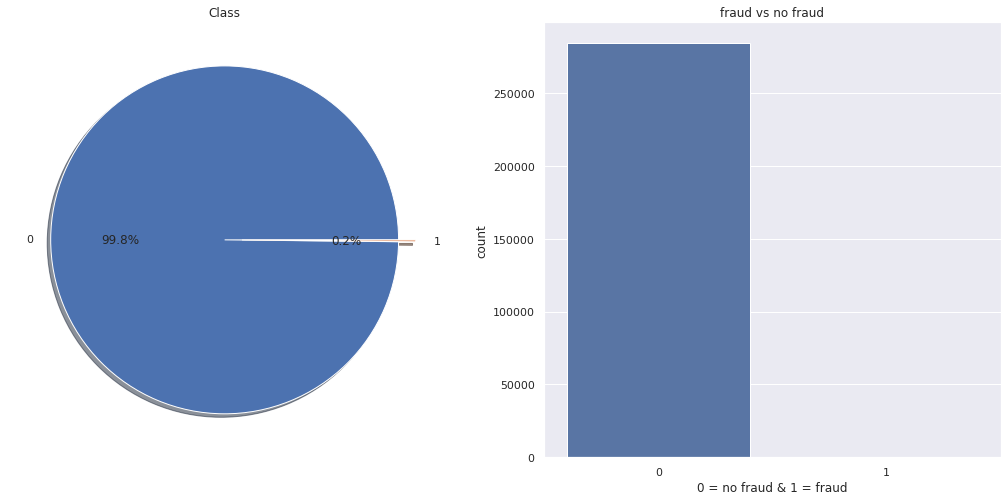

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df['Class'].value_counts().plot.pie(explode=(0,0.1),autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Class')
ax[0].set_ylabel('')

sns.countplot(x='Class',data=df,ax=ax[1])
ax[1].set_title('fraud vs no fraud')
ax[1].set_xlabel('0 = no fraud & 1 = fraud')
plt.show()



<h3> b - Amount and Time</h3>

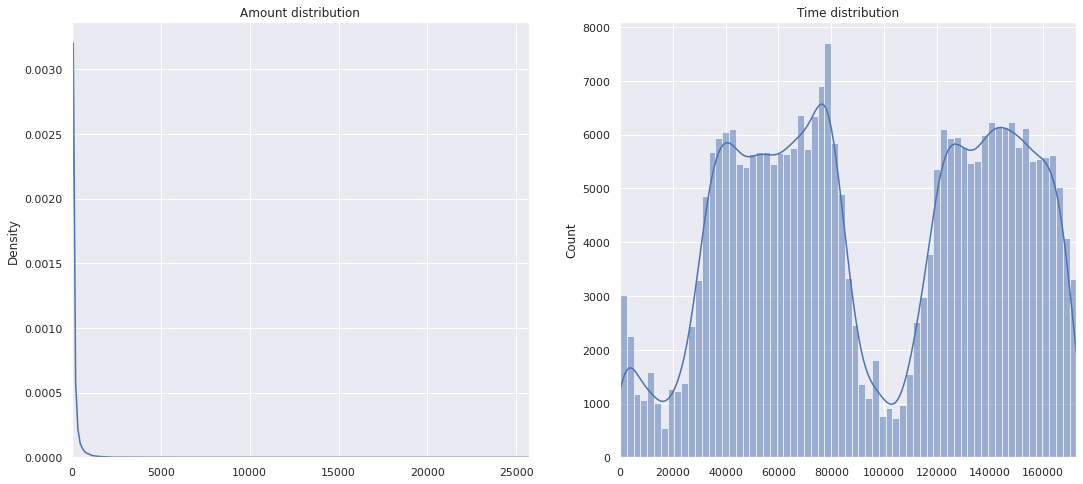

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

amount = df['Amount'].values
time = df['Time'].values

sns.kdeplot(x=amount, ax=ax[0])
ax[0].set_xlim([min(amount), max(amount)])
ax[0].set_title('Amount distribution')


sns.histplot(time, ax=ax[1], kde=True)
ax[1].set_xlim([min(time),max(time)])
ax[1].set_title('Time distribution')


plt.show()

<b> Amount:</b>
 - Most of Amount are less than 5 000 $
 - We need to go further in Amount to better understand it.
    
<b> Time: </b>
- We see 3 range of Time. (0 - 18 000, 18 000 - 100 000, 100 000 - 170 000)

Maybe Amount and Time is skewed, so we will scale those columns.

<br>

- Preparing Data (Amount - Time).
<br>
 To normalize the range of independent variables or features of data will help us to better understand data but it could also help ML algorithms to perform well.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

df['scalAmount'] = scaler.fit_transform(np.array(df['Amount']).reshape(-1,1))
df['scalTime'] = scaler.fit_transform(np.array(df['Time']).reshape(-1,1))

df = df.drop(['Time', 'Amount'], axis = 1)

df[['scalTime', 'scalAmount']].head()

,scalTime,scalAmount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403


<br> 

- <b>Splitting data</b>


Avant de rentrer dans le coeur de l'EDA. nous allons séparer notre data set en train set et test set.

Le test set n'entrera pas en compte dans l'EDA pour ne pas biaiser notre analyse.

In [ ]:
from sklearn.model_selection import train_test_split
df_origin_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

<br>
<h1> II - Handling Imbalanced Data.</h1>

- Le défi de travailler avec des ensembles de données déséquilibrés (Imbalanced) est que la plupart des techniques de ML ignoreront la (ou les) classe minoriaire, et auront à leur tour des performances médiocres sur la (ou les) classe minoritaire, bien que ce soit généralement la performance sur la classe minoritaire qui soit la plus importante.

- Lors de l'EDA également, la classe minoritaire aura moins d'importance, nous allons donc réequilibrer les données afin d'avoir autant de cas de fraude que de non fraude.

- Lors du model building nous utiliserons une technique plus avancée qui permet de mieux réequilibrer les données sans perdre trop d'information. Pour la partie de l'EDA nous nous contenterons d'extraire un sous ensemble des cas de non fraude pou qu'il soit de la même taille que l'ensemble des cas de fraudes.



<br>
<h4>A - Simple réequilibrage.</h4>

In [ ]:

df_train = df_origin_train.sample(frac=1)


fraud = df_train.loc[df_train['Class'] == 1]
non_fraud = df_train.loc[df_train['Class'] == 0][:394]

undersampled_df = pd.concat([fraud, non_fraud])

undersampled_data = undersampled_df.sample(frac=1, random_state=42)


print("After undersampling '1': {}".format(sum(undersampled_df['Class'] == 1))) 
print("After undersampling '0': {}".format(sum(undersampled_df['Class'] == 0))) 


undersampled_data.head()

After undersampling '1': 394
After undersampling '0': 394


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scalAmount,scalTime
284535,-1.066944,0.169090,1.638528,-2.191481,-0.364375,0.823917,-0.549590,0.733370,-1.248903,-0.478929,-0.811484,0.511101,1.533092,-0.382719,-0.694615,0.014446,-1.238010,2.344075,-0.842214,-0.421711,-0.286808,-0.540809,-0.337469,-1.379929,0.382657,0.589708,-0.107753,-0.033623,0,-0.225690,1.636667
214662,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,1,0.128700,0.946620
18773,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,-4.592390,5.479392,-5.657858,-2.648076,-10.384890,-0.225946,-0.701883,0.409736,0.939604,-1.954300,0.310525,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,1,-0.350511,-1.370047
52521,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,-0.792938,-0.984172,-0.567380,-1.105592,-1.381214,0.405490,0.279890,1.132160,0.092993,-0.298920,0.016004,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,1,0.070528,-1.038426
147605,1.917827,0.951967,-2.059206,3.833998,1.668192,0.769826,0.232463,0.107941,-1.143646,0.541699,0.301977,0.257697,0.709148,-2.420716,-1.997740,1.506696,0.799832,1.162764,-1.150627,-0.115922,0.015255,0.239994,-0.111916,-0.380576,0.370995,0.189117,-0.005823,-0.012105,1,-0.316407,-0.127966


<br>
<h1> III - Features selection.</h1>

La sélection des features est un étape primordiale pour avoir un modèle performant par la suite. Nous allons d'abord étudier la matrice de corrélation, elle va nous permettre de voir quelles features est corrélés avec la target. 

Dans ce cas présent nous allons regarder la corrélation individuelle de chaque feature avec la target.

Nous pourrions aussi faire une ANOVA à N facteurs pour voir l'effect conjoint de plusieurs features sur la target.

Cependant, ici, après avoir éliminé quelques features grâce à la matrix de corrélation, j'utilise une selection "KBest". Cette sélection est faite à partir de l'information mutuelle.


<h3>A - Correlation matrix.</h3>

Ce qui nous intéresse cest surtout les corrélations avec la variable Class. En effet, notre but est de prédire la variable Class, donc nous devons nous intéresser aux variables qui ont une forte corrélation avec notre Target.

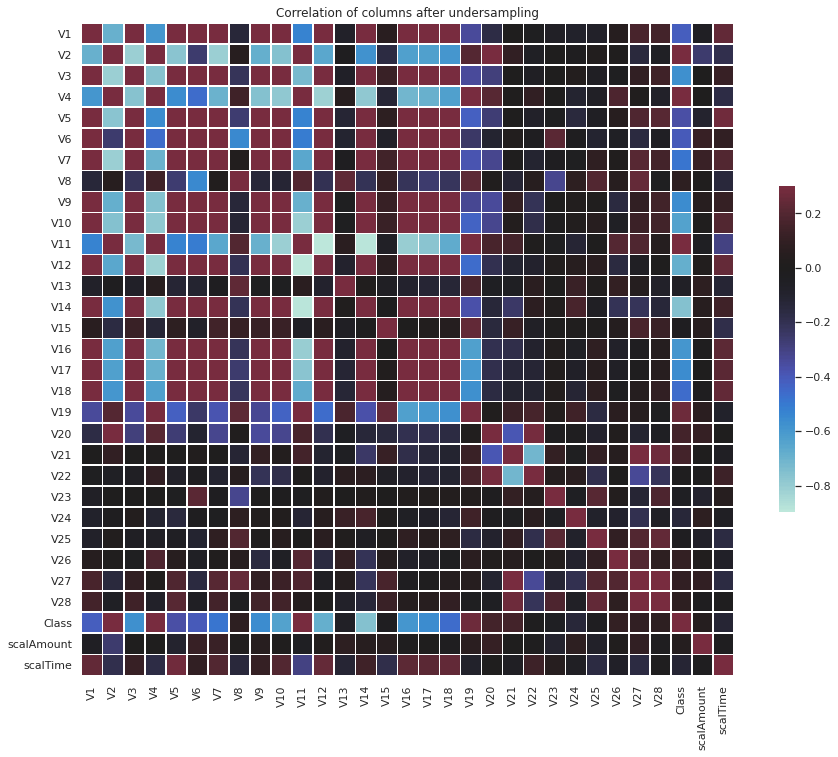

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(16,12))

sns.heatmap(undersampled_data.corr(),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_title("Correlation of columns after undersampling")
plt.show()


- <b>best positive correlation</b>: V2, V4, V11, V19

- <b> best negative correlation</b>: V1, V3, V5, V6, V7, V9, V10, V12, V14, V16, V17, V18 

In [ ]:
df_corr = undersampled_data[['V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V4', 'V11', 'V19', 'Class' ]]

<br>
<h3> B - Kbest with Mutual information.</h3>

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = fs.fit_transform(df_corr.drop(columns=['Class']).to_numpy(), df_corr.Class.to_numpy())
print(X_selected.shape)


(788, 10)


In [ ]:
columns = df_corr.drop(columns=['Class'])
mask = fs.get_support()
columns_selected =  columns.columns[mask]
print(fs.scores_[mask])
columns_selected

[0.33978599 0.28461382 0.42767718 0.42063327 0.48514737 0.3261282
 0.44330741 0.29112042 0.34542992 0.36696786]


Index(['V3', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V4', 'V11'], dtype='object')

- On va donc garder V3, V7, V10, V12, V14, V16, V17, V2, V4, V11

<h1> IV - Anomaly detection </h1>

La détection d'anomalie est importante. Certaines données pourrait être non representatives ce qui aurait pour effet de "nourrir" nos modèles avec des informations nuisibles.  

sources: https://towardsdatascience.com/boxplot-for-anomaly-detection-9eac783382fd

In [ ]:
pos = ['V2', 'V4', 'V11']
neg = [ 'V3', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17']

<br>
<h3> A - Boxplot</h3>

- Statistically speaking, a boxplot provides several pieces of information, two important ones are the quartiles, represented by both ends of the box. The distance between these two quartiles is called the Interquartile Range (IQR).

- Positive

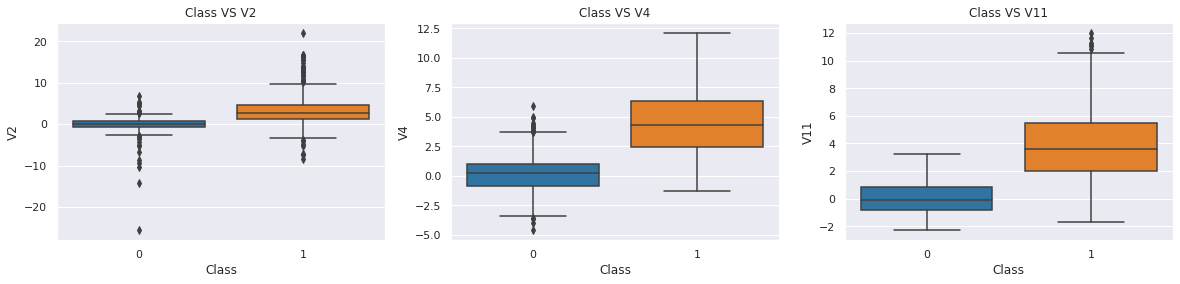

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))
for i in range(0, len(pos)):
    sns.boxplot(x="Class", y=pos[i], data=df_corr,palette=colors, ax=axes[i])
    axes[i].set_title('Class VS ' + pos[i])

- Negative

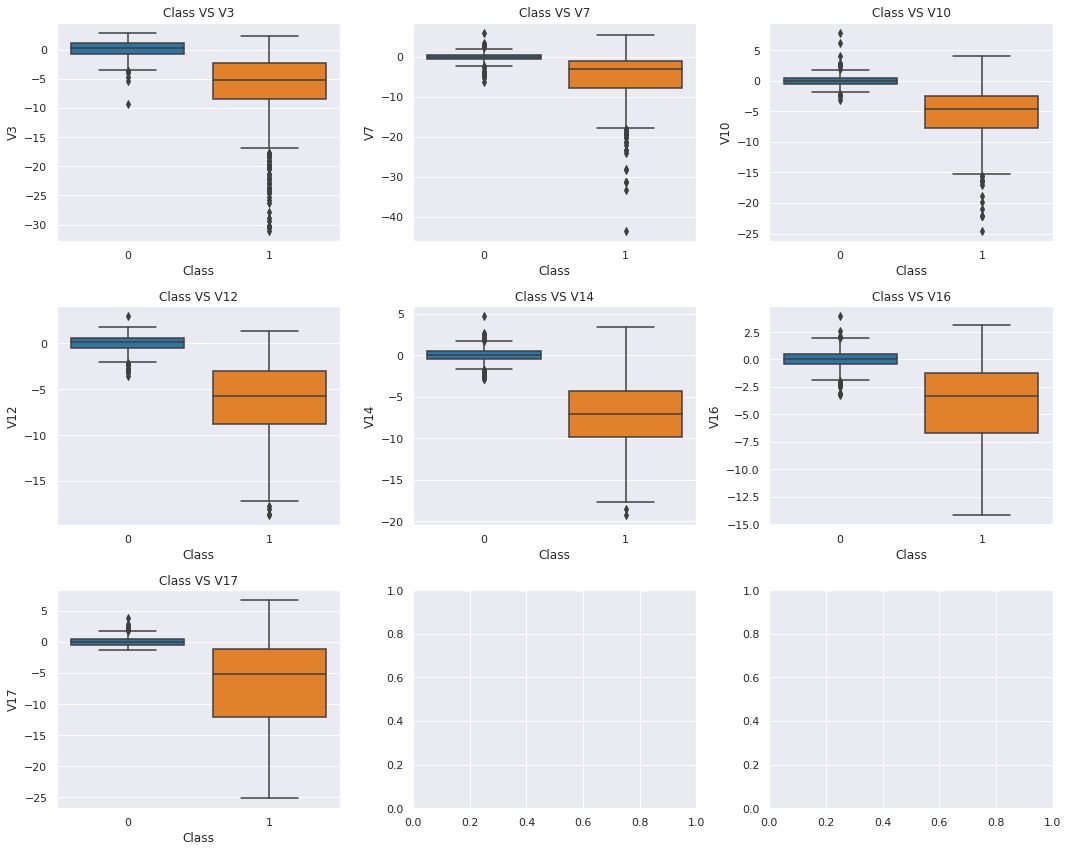

In [ ]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
for i in range(0, 3):
    sns.boxplot(x="Class", y=neg[i], data=df_corr,palette=colors, ax=axes[0][i])
    axes[0][i].set_title('Class VS ' + neg[i])
for i in range(3, 6):
    sns.boxplot(x="Class", y=neg[i], data=df_corr,palette=colors, ax=axes[1][i-3])
    axes[1][i-3].set_title('Class VS ' + neg[i])
for i in range(6, len(neg)):
    sns.boxplot(x="Class", y=neg[i], data=df_corr,palette=colors, ax=axes[2][i-6])
    axes[2][i-6].set_title('Class VS ' + neg[i])

f.tight_layout()
plt.show()

<br>

- <h3> B - IQR score : Removing outlier</h3>

- In the boxplots above, the length of the boxes is IQR, and the minimum and maximum values are represented by the whiskers. The whiskers are generally extended into threshold*IQR distance on either side of the boxes. Therefore, all data points outside these threshold*IQR values are flagged as outliers.

In [ ]:
def remove_outlier(df, column, th):
    
    outliers = []
    fraud = df[column].loc[df['Class'] == 1].values
   
    q1, q3 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    
    IQR = q3 - q1
    
    IQR_th = IQR * th
    lower, upper = q1 - IQR_th, q3 + IQR_th
    
    print('Lower: {}'.format(lower))
    print('Upper: {}'.format(upper))

    outliers = [x for x in fraud if (x < lower) or (x > upper)]
    print('Feature Outliers for Fraud Cases: {}'.format(len(outliers)))
    df = df.drop(df[(df[column] > upper) | (df[column] < lower)].index)

    print('Number of Instances after outliers removal: {}'.format(len(df)))
    print('----' * 30)
    
    return df,outliers

In [ ]:
df_woutlier = df_corr[neg+pos+['Class']]
for i in (neg+pos):
    (df_woutlier,_) = remove_outlier(df_woutlier, i, 2)


Lower: -20.71294378452484
Upper: 10.085004639816018
Feature Outliers for Fraud Cases: 25
Number of Instances after outliers removal: 763
------------------------------------------------------------------------------------------------------------------------
Lower: -15.70919361730123
Upper: 8.974959321549669
Feature Outliers for Fraud Cases: 15
Number of Instances after outliers removal: 748
------------------------------------------------------------------------------------------------------------------------
Lower: -15.006970663264614
Upper: 6.2166010982767625
Feature Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 743
------------------------------------------------------------------------------------------------------------------------
Lower: -19.171230072944212
Upper: 8.196235513928645
Feature Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 743
-------------------------------------------------------------------------------------------

<br>
<h1>V - visualization</h1>

<h3>A - PCA</h3>

L' ACP est une technique de réduction de dimension. Elle est couremment utilisée pour la visualisation de jeux de données multidimensionnels. En effet, il est souvent difficile de former des nuages de points à partir de données qui possèdent plus de deux caractéristiques. 

- A key insight from  The figure below shows that for the most data the class 0 will be easy to separate from the other class 1.
- Cependant, quelques membres de la classe 0 se confondent parmis le groupe formé par la classe 1.

[0.83713313 0.07182414 0.0245874 ]


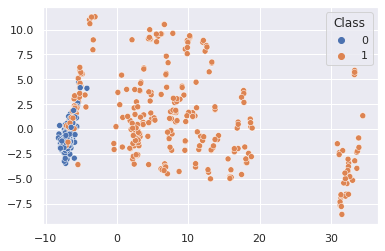

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
coords = pca.fit_transform(df_woutlier.drop(columns=['Class']).to_numpy())
print(pca.explained_variance_ratio_)
sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=df_woutlier.Class)
plt.show()

<h3>B - Factor map</h3>

In [ ]:
!pip install -i https://test.pypi.org/simple/ variable-factor-map-Huy-Bui==0.0.3

Looking in indexes: https://test.pypi.org/simple/


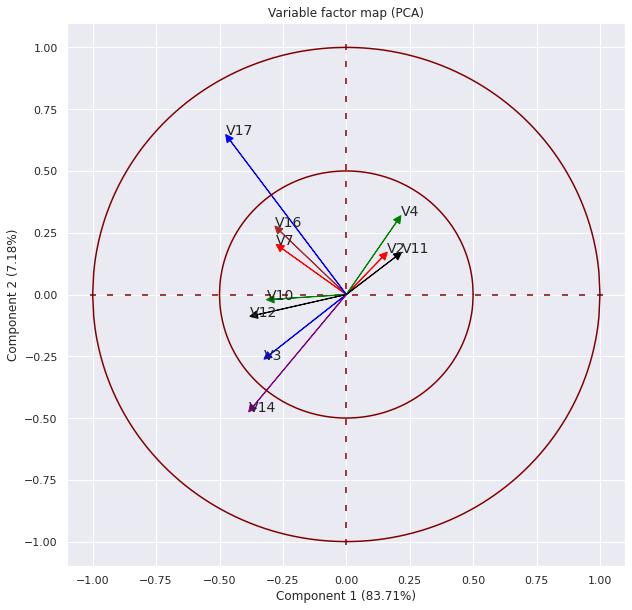

In [ ]:
from variable_factor_map import pca_map 
pca_map(df_woutlier.drop(columns=['Class']), figsize=(10,10), print_values=False)
plt.show()

In [ ]:

for i in (neg+pos):
    (df_origin_train,_) = remove_outlier(df_origin_train, i, 1.75)
    
features = neg+pos+['Class']

df_origin_train[features].to_csv('/content/gdrive/MyDrive/DS_project/dataset/credit_card_fraud/train_set.csv',index=False)
df_test[features].to_csv('/content/gdrive/MyDrive/DS_project/dataset/credit_card_fraud/test_set.csv',index=False)

Lower: -19.173046363307797
Upper: 8.545107218598975
Feature Outliers for Fraud Cases: 33
Number of Instances after outliers removal: 227798
------------------------------------------------------------------------------------------------------------------------
Lower: -14.15571796074737
Upper: 7.548311452518352
Feature Outliers for Fraud Cases: 21
Number of Instances after outliers removal: 227497
------------------------------------------------------------------------------------------------------------------------
Lower: -13.244292698261606
Upper: 4.893032606785982
Feature Outliers for Fraud Cases: 8
Number of Instances after outliers removal: 226310
------------------------------------------------------------------------------------------------------------------------
Lower: -16.765233737946854
Upper: 6.429233543965631
Feature Outliers for Fraud Cases: 6
Number of Instances after outliers removal: 226304
--------------------------------------------------------------------------------